In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import epanet as epa
import epamodule as em

In [3]:
links = ["../../networks/b-town/nodes", "../../networks/b-town/links", "../../networks/b-town/rede.inp", \
         "../../networks/b-town/3dim.csv"]

In [4]:
group_links = [[1,2,14,13,12,11,10,9,20],[15,16,17,18,19],[4,3,5,6,7,8]]
# 2 => [15, 16, 17, 18, 19]
# 3 => [4, 3, 5, 6, 7, 8]
# 1 => [1, 2, 14, 13, 12, 11, 10, 9, 20]

In [5]:
t = np.array([0.01, 0.079,0.115])

In [6]:
net = epa.Rede(links, group_links, t)

Começando simulação


In [7]:
net.gradient([0.01, 0.079, 0.115])

array([-0.012,  0.   , -0.001])

In [ ]:
interacoes = 100
lr = 0.001
dim = 3
x0 = np.array([0.002,0.1,0.100])
x = np.zeros((interacoes,dim))
x[0,:] = x0
y = np.zeros((interacoes,))
y[0] = net.objetivo(x0)
for i in range(1,interacoes):
    x[i,:] += x[i-1,:] - lr*net.gradient(x[i-1,:])
    y[i] += net.objetivo(x[i,:]) 

In [ ]:
plt.plot(y)

In [ ]:
min(y)

In [ ]:
lr = 0.001
dim = 3
x0 = np.array([0.002,0.1,0.100])
x = x0
y = [net.objetivo(x0)]
i = 0
values = [x0]
while sum(abs(net.gradient(x)) > 0.1):
    x -= lr*net.gradient(x)    
    y.append(net.objetivo(x)) 
    values.append(x)
    i+=1
    if i > 200:
        break

In [ ]:
plt.plot(y[:90:])

In [ ]:
values[y.index(min(y))]

In [ ]:
bool(sum(x > 0))

# Fazendo a função para aplicar em múltiplos pontos iniciais

In [26]:
def grad_steps(x0, lr=0.001, max_interacoes=400):
    dim = len(x0)
    x = x0
    y = [net.objetivo(x0)]
    i = 0
    values = [x0]
    while sum(abs(net.gradient(x)) > 0.1):
        x -= lr*net.gradient(x)    
        y.append(net.objetivo(x)) 
        values.append(x)
        i+=1
        if i > max_interacoes:
            print("Excedeu as interações limite")
            break
        if sum(x<0):
            print("Escapou do intervalo de confiança")
            break
    net.restart()
    return values[y.index(min(y))], y

In [13]:
#x0 = np.random.random(3)*0.2 +0.001
x0 = np.array([0.09435675, 0.18852395, 0.14145076])

array([0.09435675, 0.18852395, 0.14145076])

In [16]:
x, y = grad_steps(x0)

Excedeu as interações limite


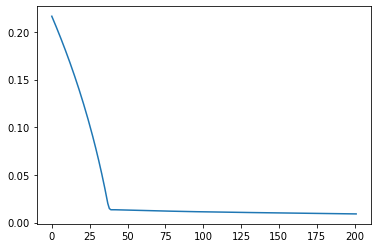

In [17]:
plt.plot(y)

In [18]:
x

array([0.00230275, 0.16758295, 0.14111576])

In [19]:
net.get_dist(x)

0.0926726481140464

In [ ]:
x, y = grad_steps(x0, max_interacoes=400)

In [ ]:
plt.plot(y)

In [ ]:
x

In [15]:
net.restart()

# Gerando os números aleatórios

In [9]:
#values = np.random.random((100,3))*0.2 +0.001

In [12]:
# arq = open("teste1.txt", 'w')
# np.savetxt(arq, values)
# arq.close()

In [14]:
arq = open("teste1.txt")
values = np.loadtxt(arq)
arq.close()

In [27]:
net.restart()

In [28]:
pontos = []
pontos_y = []
for i in range(values.shape[0]):
    try:
        x, y = grad_steps(values[i,:])
        pontos.append(x)
        pontos_y.append(net.objetivo(x))
        print(i, x)
        print()
    except:
        continue

Excedeu as interações limite
0 [0.00832063 0.09262374 0.11578415]

Excedeu as interações limite
1 [0.01006734 0.09410777 0.11719681]

Excedeu as interações limite
3 [0.01007716 0.09405726 0.1171708 ]

Excedeu as interações limite
5 [0.00855389 0.07281928 0.1238765 ]

Excedeu as interações limite
6 [0.00878549 0.07018028 0.11599268]

Excedeu as interações limite
7 [0.01001547 0.09433832 0.11729988]

Excedeu as interações limite
8 [0.00929945 0.08066345 0.11177863]

Excedeu as interações limite
9 [0.00988306 0.0656234  0.11293975]

Excedeu as interações limite
10 [0.01211505 0.05840022 0.10729514]

Excedeu as interações limite
11 [0.01256642 0.05636105 0.10594625]

Excedeu as interações limite
12 [0.01191405 0.06452389 0.11264305]

Excedeu as interações limite
15 [0.01183167 0.06541169 0.11331316]

Excedeu as interações limite
16 [0.00531375 0.124453   0.12966331]

Excedeu as interações limite
17 [0.01064945 0.09061786 0.10784968]

Excedeu as interações limite
20 [0.0118578  0.06505867 0

In [50]:
pontos = np.array(pontos)
pontos_y = np.array(pontos_y)

In [34]:
arq = open("teste1/result.txt", 'w')
np.savetxt(arq, pontos)
arq.close()

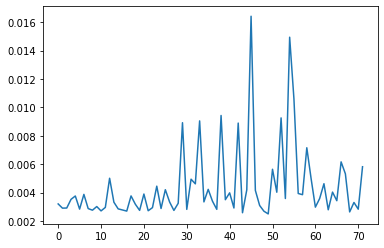

In [51]:
plt.plot(pontos_y)

In [52]:
pontos_y.mean()

0.004419986112618147

array([0.00320286, 0.00290701, 0.00291549, 0.00352679, 0.00376182,
       0.00283909, 0.00387573, 0.0028766 , 0.00276195, 0.00301891,
       0.00271278, 0.0029565 , 0.00501166, 0.00332483, 0.00285477,
       0.00277827, 0.0026989 , 0.00376754, 0.00318442, 0.00274976,
       0.00389979, 0.00272348, 0.00294357, 0.00445429, 0.00288211,
       0.00420549, 0.00333648, 0.00274626, 0.00324864, 0.00892353,
       0.00282023, 0.00494523, 0.00461811, 0.00905122, 0.00334697,
       0.00422933, 0.00339381, 0.00282256, 0.00943216, 0.00350126,
       0.0039835 , 0.00291782, 0.00889768, 0.00258308, 0.00419543,
       0.01642185, 0.00415611, 0.00309372, 0.00269032, 0.00250011,
       0.0056448 , 0.00402832, 0.00926251, 0.00358539, 0.01494567,
       0.01059172, 0.00393772, 0.00385496, 0.00715987, 0.00499344,
       0.00297684, 0.00358582, 0.00462765, 0.00279151, 0.00403637,
       0.00343037, 0.00616572, 0.00532521, 0.00264168, 0.0033066 ,
       0.00283368, 0.00582335])

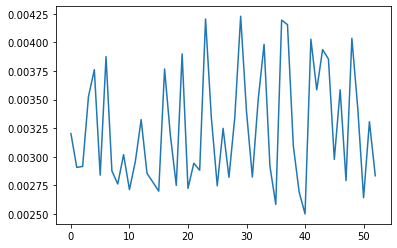

In [53]:
plt.plot(pontos_y[np.where(pontos_y<=pontos_y.mean())])

In [54]:
indices = np.where(pontos_y<=pontos_y.mean())

# Calculando Centróide dos pontos resultantes

## Centróide:

In [35]:
def calc_centroide(vetor_pontos):
    tamanho = vetor_pontos.shape[0]
    v = []
    for i in range(vetor_pontos.shape[1]):
        v.append(vetor_pontos[:,i].sum()/tamanho)
    return v
    

In [36]:
v = calc_centroide(pontos)

In [40]:
v

[0.01006880326016945, 0.0875926346996257, 0.11300749327287618]

In [42]:
net.target

array([0.01 , 0.079, 0.115])

### Calculando Centróide dos pontos abaixo da média

In [55]:
calc_centroide(pontos[indices])

[0.010276857784830782, 0.07735554166567311, 0.11399676764509119]

## Distancia do Centróide ao ponto Target

In [39]:
net.get_dist(v) # isso tem que tender a 0

0.008820894967488002

In [56]:
net.get_dist(calc_centroide(pontos[indices]))

0.0019461162874541847

# Gerando uma quantidade maior de pontos

In [44]:
# values = np.random.random((500,3))*0.2 +0.001

In [45]:
# arq = open("teste2/teste2.txt", 'w')
# np.savetxt(arq, values)
# arq.close()

In [ ]:
arq = open("teste2/teste2.txt")
values = np.loadtxt(arq)
arq.close()

In [46]:
net.restart()

In [60]:
pontos = []
pontos_y = []
for i in range(values.shape[0]):
    try:
        x, y = grad_steps(values[i,:])
        pontos.append(x)
        pontos_y.append(net.objetivo(x))
        print(i, x)
        print()
    except:
        continue

Excedeu as interações limite
0 [0.00910282 0.11994653 0.11406675]

Excedeu as interações limite
1 [0.01206841 0.08157649 0.11290617]

Excedeu as interações limite
3 [0.01128139 0.08771704 0.11426929]

Excedeu as interações limite
5 [0.00900441 0.08383144 0.11275139]

Excedeu as interações limite
6 [0.01005598 0.09415412 0.11721708]

Excedeu as interações limite
7 [0.00921083 0.08330071 0.11212239]

Excedeu as interações limite
8 [0.01452041 0.04833284 0.10037984]

Excedeu as interações limite
9 [0.01163472 0.06186378 0.10676504]

Excedeu as interações limite
10 [0.0121436  0.08044081 0.11222228]

Excedeu as interações limite
11 [0.00390564 0.13010508 0.13678734]

Excedeu as interações limite
15 [0.01222696 0.07651707 0.11148442]

Excedeu as interações limite
16 [0.0069874  0.09478539 0.12267518]

Excedeu as interações limite
17 [0.01807905 0.03637975 0.09214044]

Excedeu as interações limite
18 [0.01031739 0.0641465  0.11169237]

Excedeu as interações limite
20 [0.00998553 0.06524366 0

Excedeu as interações limite
170 [0.00867104 0.07421742 0.12106759]

Excedeu as interações limite
171 [0.0104563  0.08769962 0.11966062]

Excedeu as interações limite
172 [0.0114004  0.07045778 0.11616174]

Excedeu as interações limite
174 [0.00824526 0.09350605 0.11631588]

Excedeu as interações limite
175 [0.01637673 0.04416573 0.09773309]

Excedeu as interações limite
176 [0.00382676 0.13062137 0.13701747]

Excedeu as interações limite
177 [0.01054794 0.13841755 0.0883436 ]

Excedeu as interações limite
178 [0.01025821 0.064307   0.1119021 ]

Excedeu as interações limite
180 [0.00461417 0.11980028 0.13111046]

Excedeu as interações limite
181 [0.00915633 0.12142895 0.11285504]

Excedeu as interações limite
182 [0.00769519 0.08783339 0.11917503]

Excedeu as interações limite
183 [0.0122024  0.07294956 0.11184221]

Excedeu as interações limite
184 [0.00152422 0.14979852 0.14344832]

Excedeu as interações limite
185 [0.00910539 0.09789361 0.11984817]

Excedeu as interações limite
187 [

Excedeu as interações limite
336 [0.00629253 0.10886008 0.12537712]

Excedeu as interações limite
338 [0.01087195 0.09190607 0.10553795]

Excedeu as interações limite
339 [0.01141612 0.06157577 0.10933411]

Excedeu as interações limite
340 [0.00490535 0.12145073 0.13130432]

Excedeu as interações limite
341 [0.01019871 0.0644739  0.11212745]

Excedeu as interações limite
342 [0.01076311 0.08311376 0.11903373]

Excedeu as interações limite
343 [0.00930438 0.07176797 0.11238547]

Excedeu as interações limite
344 [0.01066546 0.08354641 0.11933721]

Excedeu as interações limite
347 [0.00388726 0.13018483 0.13677598]

Excedeu as interações limite
348 [0.00998838 0.09445076 0.11735063]

Excedeu as interações limite
351 [0.0083438  0.09233324 0.11561226]

Excedeu as interações limite
352 [0.01171656 0.1325382  0.08240126]

Excedeu as interações limite
354 [0.00851019 0.09958232 0.12103719]

Excedeu as interações limite
356 [0.00731907 0.09786411 0.12073862]

Excedeu as interações limite
358 [

Excedeu as interações limite
497 [0.00944458 0.11399763 0.10834432]

Excedeu as interações limite
499 [0.00945705 0.07869277 0.11111264]



In [61]:
pontos = np.array(pontos)
pontos_y = np.array(pontos_y)

In [62]:
arq = open("teste2/result.txt", 'w')
np.savetxt(arq, pontos)
arq.close()

In [63]:
v = calc_centroide(pontos)

In [64]:
net.get_dist(v) # isso tem que tender a 0

0.005971095993946788

In [65]:
#values[40,:]
v

[0.010300934066713474, 0.08473241877854609, 0.11335598023010951]

In [68]:
np.array(v).round(3)

array([0.01 , 0.085, 0.113])